<a href="https://colab.research.google.com/github/Huyrua27/Exercise/blob/main/Pytorch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

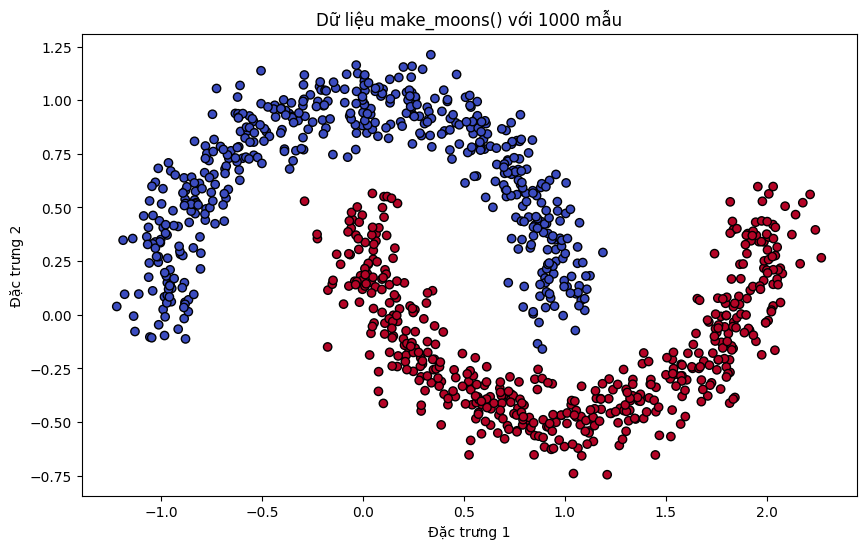

BinaryClassifier(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
Bắt đầu huấn luyện mô hình phân loại nhị phân...
Epoch [10/300], Train Loss: 0.5946, Test Loss: 0.5901, Train Acc: 0.8087, Test Acc: 0.7800
Epoch [20/300], Train Loss: 0.4124, Test Loss: 0.4146, Train Acc: 0.8313, Test Acc: 0.8300
Epoch [30/300], Train Loss: 0.2946, Test Loss: 0.2988, Train Acc: 0.8600, Test Acc: 0.8400
Epoch [40/300], Train Loss: 0.2390, Test Loss: 0.2353, Train Acc: 0.8775, Test Acc: 0.8850
Epoch [50/300], Train Loss: 0.1972, Test Loss: 0.1923, Train Acc: 0.9113, Test Acc: 0.9200
Epoch [60/300], Train Loss: 0.1731, Test Loss: 0.1676, Train Acc: 0.9225, Test Acc: 0.9200
Epoch [70/300], Train Loss: 0.1494, Test Loss: 0.1424, Train Acc: 0.9375, Test Acc: 0.9350
Epoch [80/300], Train Loss: 0.1237, Test Loss: 0.1172, Train Acc: 0.9

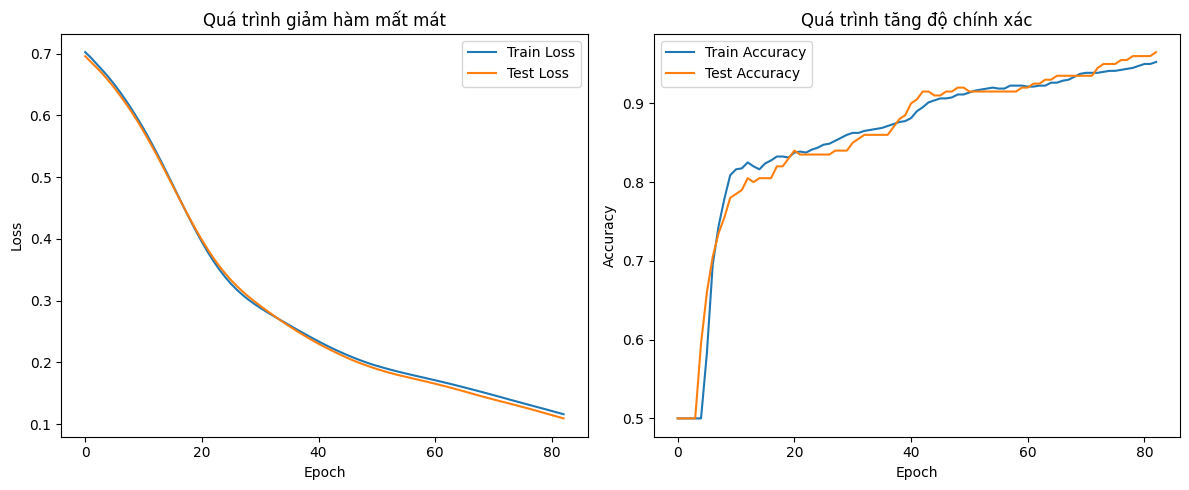

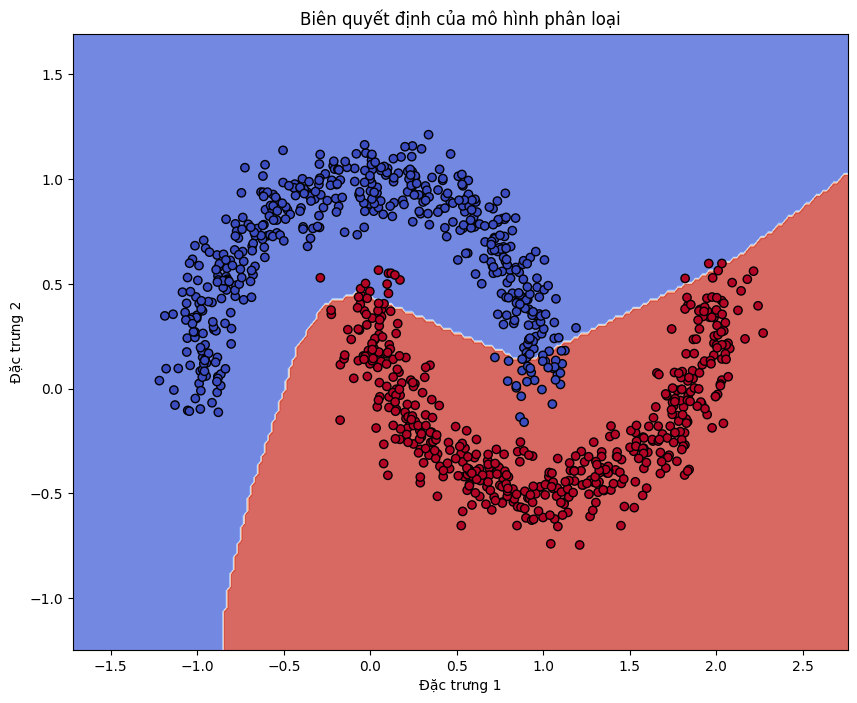

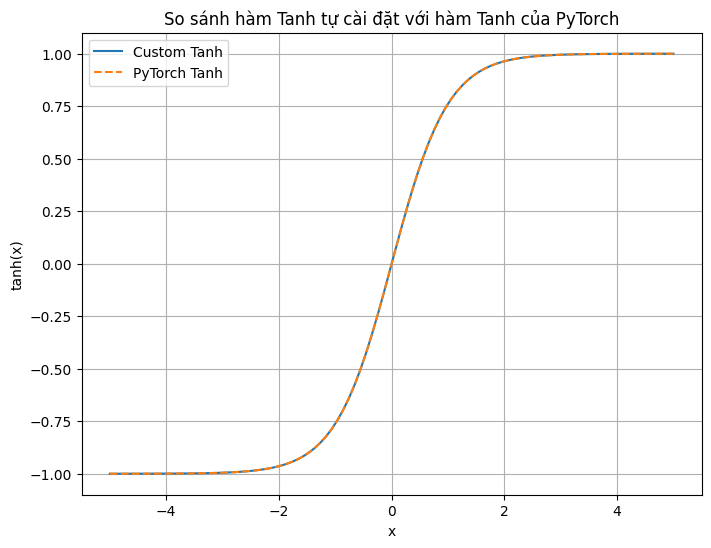

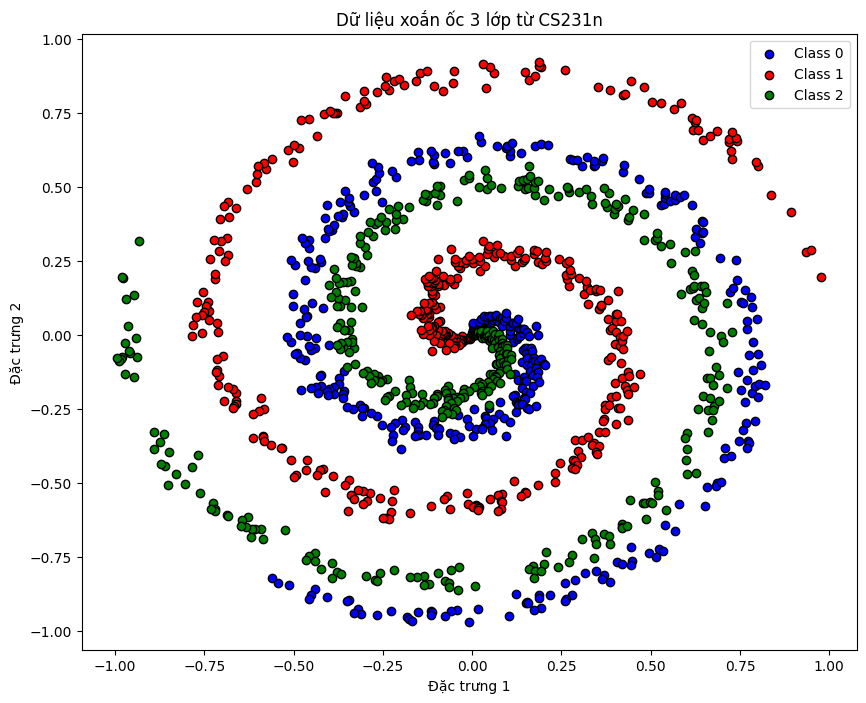

SpiralClassifier(
  (layer1): Linear(in_features=2, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=50, bias=True)
  (layer4): Linear(in_features=50, out_features=3, bias=True)
  (relu): ReLU()
)
Bắt đầu huấn luyện mô hình phân loại đa lớp...
Epoch [10/500], Train Loss: 1.0910, Test Loss: 1.0916, Train Acc: 0.3542, Test Acc: 0.3875
Epoch [20/500], Train Loss: 1.0773, Test Loss: 1.0827, Train Acc: 0.4354, Test Acc: 0.4125
Epoch [30/500], Train Loss: 1.0631, Test Loss: 1.0732, Train Acc: 0.4323, Test Acc: 0.4333
Epoch [40/500], Train Loss: 1.0526, Test Loss: 1.0660, Train Acc: 0.4313, Test Acc: 0.4375
Epoch [50/500], Train Loss: 1.0421, Test Loss: 1.0591, Train Acc: 0.4323, Test Acc: 0.4375
Epoch [60/500], Train Loss: 1.0273, Test Loss: 1.0460, Train Acc: 0.4417, Test Acc: 0.4375
Epoch [70/500], Train Loss: 1.0057, Test Loss: 1.0259, Train Acc: 0.4354, Test Acc: 0.4083
Epoch [80/500], Train Los

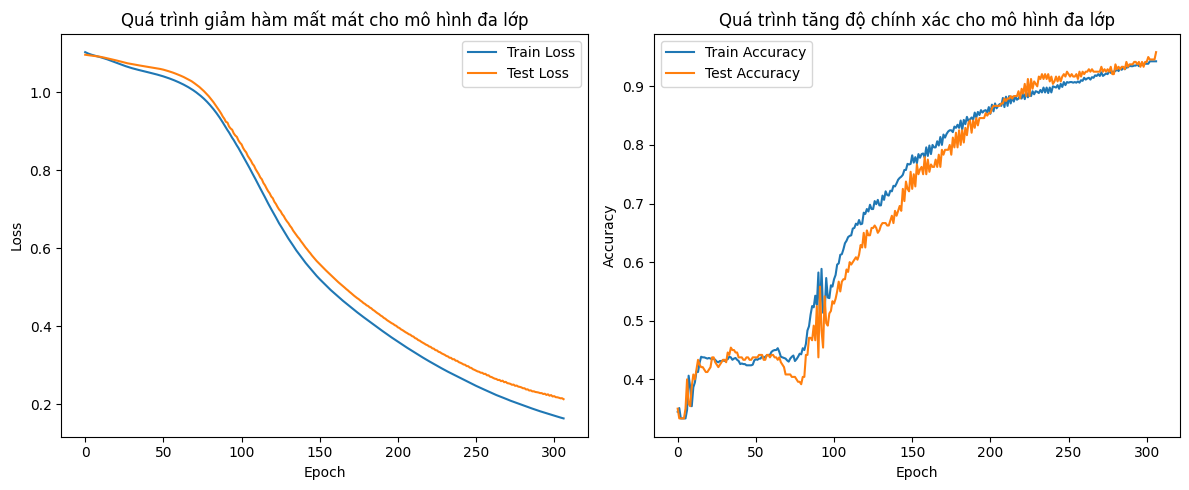

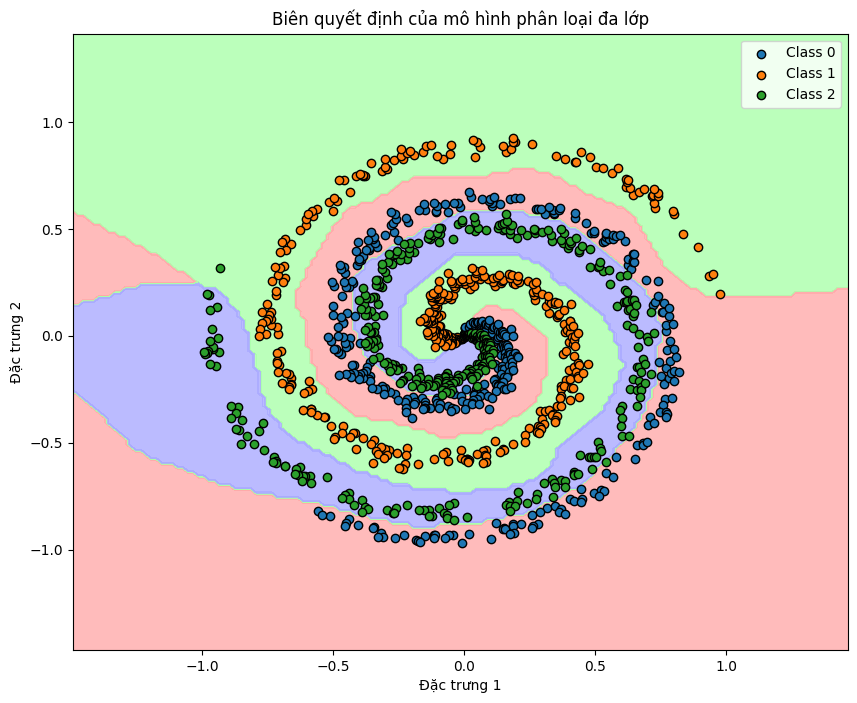

=== Tóm tắt kết quả ===
Độ chính xác của mô hình phân loại nhị phân: 0.9650
Độ chính xác của mô hình phân loại đa lớp: 0.9583
Cả hai mô hình đều đạt yêu cầu độ chính xác (>96% cho nhị phân và >95% cho đa lớp)


In [4]:
# PHÂN LOẠI SỬ DỤNG PYTORCH VỚI TẬP DỮ LIỆU MOON VÀ SPIRAL
# Mã nguồn này thực hiện phân loại nhị phân và đa lớp sử dụng PyTorch

# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. Tạo tập dữ liệu phân loại nhị phân với hàm make_moons()
# =============================================================

# Tạo dữ liệu với 1000 mẫu và random_state=42 để đảm bảo tính nhất quán
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Chuyển đổi dữ liệu sang PyTorch tensor
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).unsqueeze(1)  # Thêm một chiều để phù hợp với hàm loss

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Hiển thị dữ liệu để kiểm tra
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Dữ liệu make_moons() với 1000 mẫu')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.show()

# 2. Xây dựng mô hình phân loại nhị phân
# =============================================================

class BinaryClassifier(nn.Module):
    """
    Mô hình mạng neural đơn giản cho phân loại nhị phân
    với các hàm kích hoạt phi tuyến tính
    """
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        # Xây dựng mạng với 3 lớp ẩn và hàm kích hoạt ReLU
        self.layer1 = nn.Linear(input_dim, 16)
        self.layer2 = nn.Linear(16, 8)
        self.layer3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Dùng sigmoid cho đầu ra nhị phân

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Khởi tạo mô hình
model = BinaryClassifier(X_train.shape[1])
print(model)

# 3. Thiết lập hàm mất mát và bộ tối ưu hóa
# =============================================================

# Sử dụng Binary Cross Entropy Loss cho bài toán phân loại nhị phân
criterion = nn.BCELoss()

# Sử dụng Adam optimizer với learning rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. Vòng lặp huấn luyện và kiểm tra
# =============================================================

# Hàm tính độ chính xác
def calculate_accuracy(y_true, y_pred):
    """Tính độ chính xác cho bài toán phân loại nhị phân"""
    predicted = y_pred.round()
    acc = (predicted == y_true).sum().item() / len(y_true)
    return acc

# Huấn luyện mô hình
epochs = 300  # Số lượng epoch tối đa
print_every = 10  # In kết quả mỗi 10 epoch

# Lưu lịch sử huấn luyện
history = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}

print("Bắt đầu huấn luyện mô hình phân loại nhị phân...")
for epoch in range(epochs):
    # Chuyển sang chế độ huấn luyện
    model.train()

    # Forward pass
    outputs = model(X_train)

    # Tính toán mất mát
    loss = criterion(outputs, y_train)

    # Backward và tối ưu
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Đánh giá trên tập huấn luyện
    train_acc = calculate_accuracy(y_train, outputs)

    # Chuyển sang chế độ đánh giá
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_acc = calculate_accuracy(y_test, test_outputs)

    # Lưu lịch sử
    history['train_loss'].append(loss.item())
    history['test_loss'].append(test_loss.item())
    history['train_acc'].append(train_acc)
    history['test_acc'].append(test_acc)

    # In kết quả định kỳ
    if (epoch + 1) % print_every == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
              f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

    # Điều kiện dừng sớm nếu độ chính xác đạt yêu cầu
    if test_acc > 0.96:
        print(f'Đã đạt độ chính xác mục tiêu (>96%) sau {epoch+1} epochs!')
        break

# Vẽ biểu đồ quá trình huấn luyện
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Quá trình giảm hàm mất mát')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['test_acc'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Quá trình tăng độ chính xác')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Hàm vẽ biên quyết định và dự đoán
# =============================================================

def plot_decision_boundary(model, X, y):
    """
    Vẽ biên quyết định của mô hình trên tập dữ liệu

    Tham số:
    - model: Mô hình PyTorch đã được huấn luyện
    - X: Dữ liệu đầu vào (tensor)
    - y: Nhãn (tensor)
    """
    # Chuyển model sang chế độ đánh giá
    model.eval()

    # Xác định khoảng vẽ
    x_min, x_max = X[:, 0].min().item() - 0.5, X[:, 0].max().item() + 0.5
    y_min, y_max = X[:, 1].min().item() - 0.5, X[:, 1].max().item() + 0.5

    # Tạo lưới điểm để dự đoán
    h = 0.02  # kích thước bước lưới
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Dự đoán cho toàn bộ lưới điểm
    with torch.no_grad():
        grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
        Z = model(grid)
        Z = Z.round().reshape(xx.shape)

    # Vẽ biên quyết định
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z.numpy(), cmap=plt.cm.coolwarm, alpha=0.8)

    # Vẽ các điểm dữ liệu
    X_np = X.numpy()
    y_np = y.numpy().squeeze()
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Biên quyết định của mô hình phân loại')
    plt.xlabel('Đặc trưng 1')
    plt.ylabel('Đặc trưng 2')
    plt.show()

# Vẽ biên quyết định cho tất cả dữ liệu
plot_decision_boundary(model, X_tensor, y_tensor)

# 6. Tự triển khai hàm kích hoạt Tanh bằng PyTorch thuần túy
# =============================================================

class CustomTanh(nn.Module):
    """
    Triển khai hàm kích hoạt Tanh (hyperbolic tangent) bằng PyTorch thuần túy
    Công thức: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
    """
    def __init__(self):
        super(CustomTanh, self).__init__()

    def forward(self, x):
        # Triển khai công thức Tanh
        numerator = torch.exp(x) - torch.exp(-x)
        denominator = torch.exp(x) + torch.exp(-x)
        return numerator / denominator

# Kiểm tra hàm Tanh tự cài đặt
x = torch.linspace(-5, 5, 100)
custom_tanh = CustomTanh()
tanh_out = custom_tanh(x)
torch_tanh = torch.tanh(x)

plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), tanh_out.detach().numpy(), label='Custom Tanh')
plt.plot(x.numpy(), torch_tanh.numpy(), '--', label='PyTorch Tanh')
plt.title('So sánh hàm Tanh tự cài đặt với hàm Tanh của PyTorch')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.legend()
plt.grid(True)
plt.show()

# 7. Tạo bộ dữ liệu đa lớp với hàm tạo spiral
# =============================================================

def generate_spiral_data(samples_per_class, num_classes, noise=0.5):
    """
    Hàm tạo dữ liệu xoắn ốc cho bài toán phân loại đa lớp
    Trích xuất từ CS231n

    Tham số:
    - samples_per_class: Số mẫu cho mỗi lớp
    - num_classes: Số lớp
    - noise: Lượng nhiễu được thêm vào dữ liệu

    Trả về:
    - X: Dữ liệu có kích thước (N, 2) với N = samples_per_class * num_classes
    - y: Nhãn có kích thước (N,)
    """
    N = samples_per_class * num_classes
    X = np.zeros((N, 2))
    y = np.zeros(N, dtype=np.int32)  # Thay đổi từ np.int sang np.int32

    for j in range(num_classes):
        ix = range(samples_per_class * j, samples_per_class * (j + 1))
        r = np.linspace(0.0, 1, samples_per_class)
        t = np.linspace(j * 4, (j + 1) * 4, samples_per_class) + np.random.randn(samples_per_class) * noise
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = j

    return X, y
# Tạo dữ liệu xoắn ốc với 3 lớp
samples_per_class = 400
num_classes = 3
X_spiral, y_spiral = generate_spiral_data(samples_per_class, num_classes, noise=0.1)

# Chuyển đổi sang tensor
X_spiral_tensor = torch.FloatTensor(X_spiral)
y_spiral_tensor = torch.LongTensor(y_spiral)  # Dùng LongTensor cho CrossEntropyLoss

# Chia thành tập huấn luyện và kiểm tra
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(
    X_spiral_tensor, y_spiral_tensor, test_size=0.2, random_state=42
)

# Hiển thị dữ liệu xoắn ốc
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i in range(num_classes):
    plt.scatter(
        X_spiral[y_spiral == i, 0], X_spiral[y_spiral == i, 1],
        c=colors[i], label=f'Class {i}', edgecolors='k'
    )
plt.title('Dữ liệu xoắn ốc 3 lớp từ CS231n')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.legend()
plt.show()

# Xây dựng mô hình cho phân loại đa lớp
class SpiralClassifier(nn.Module):
    """
    Mô hình mạng neural cho phân loại đa lớp với dữ liệu xoắn ốc
    """
    def __init__(self, input_dim, num_classes):
        super(SpiralClassifier, self).__init__()
        # Xây dựng mạng với nhiều lớp ẩn để học các đặc trưng phi tuyến tính
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 50)
        self.layer4 = nn.Linear(50, num_classes)
        self.relu = nn.ReLU()
        # Không cần softmax ở cuối vì nn.CrossEntropyLoss đã tích hợp sẵn softmax

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.layer4(x)  # Đầu ra logits cho CrossEntropyLoss
        return x

# Khởi tạo mô hình đa lớp
spiral_model = SpiralClassifier(X_spiral_train.shape[1], num_classes)
print(spiral_model)

# Thiết lập hàm mất mát và tối ưu hóa cho phân loại đa lớp
# Cross Entropy Loss phù hợp cho bài toán phân loại đa lớp
spiral_criterion = nn.CrossEntropyLoss()

# Sử dụng Adam optimizer thay vì SGD như được đề xuất
spiral_optimizer = optim.Adam(spiral_model.parameters(), lr=0.001)

# Hàm tính độ chính xác cho phân loại đa lớp
def calculate_multiclass_accuracy(outputs, labels):
    """Tính độ chính xác cho bài toán phân loại đa lớp"""
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Huấn luyện mô hình đa lớp
spiral_epochs = 500  # Số lượng epoch tối đa
print_every = 10  # In kết quả mỗi 10 epoch

# Lưu lịch sử huấn luyện
spiral_history = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}

print("Bắt đầu huấn luyện mô hình phân loại đa lớp...")
for epoch in range(spiral_epochs):
    # Chuyển sang chế độ huấn luyện
    spiral_model.train()

    # Forward pass
    outputs = spiral_model(X_spiral_train)

    # Tính toán mất mát
    loss = spiral_criterion(outputs, y_spiral_train)

    # Backward và tối ưu
    spiral_optimizer.zero_grad()
    loss.backward()
    spiral_optimizer.step()

    # Đánh giá trên tập huấn luyện
    train_acc = calculate_multiclass_accuracy(outputs, y_spiral_train)

    # Chuyển sang chế độ đánh giá
    spiral_model.eval()
    with torch.no_grad():
        test_outputs = spiral_model(X_spiral_test)
        test_loss = spiral_criterion(test_outputs, y_spiral_test)
        test_acc = calculate_multiclass_accuracy(test_outputs, y_spiral_test)

    # Lưu lịch sử
    spiral_history['train_loss'].append(loss.item())
    spiral_history['test_loss'].append(test_loss.item())
    spiral_history['train_acc'].append(train_acc)
    spiral_history['test_acc'].append(test_acc)

    # In kết quả định kỳ
    if (epoch + 1) % print_every == 0:
        print(f'Epoch [{epoch+1}/{spiral_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
              f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

    # Điều kiện dừng sớm nếu độ chính xác đạt yêu cầu
    if test_acc > 0.95:
        print(f'Đã đạt độ chính xác mục tiêu (>95%) sau {epoch+1} epochs!')
        break

# Vẽ biểu đồ quá trình huấn luyện cho mô hình đa lớp
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(spiral_history['train_loss'], label='Train Loss')
plt.plot(spiral_history['test_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Quá trình giảm hàm mất mát cho mô hình đa lớp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(spiral_history['train_acc'], label='Train Accuracy')
plt.plot(spiral_history['test_acc'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Quá trình tăng độ chính xác cho mô hình đa lớp')
plt.legend()

plt.tight_layout()
plt.show()

# Hàm vẽ biên quyết định cho phân loại đa lớp
def plot_multiclass_decision_boundary(model, X, y, num_classes):
    """
    Vẽ biên quyết định của mô hình đa lớp trên tập dữ liệu

    Tham số:
    - model: Mô hình PyTorch đã được huấn luyện
    - X: Dữ liệu đầu vào (tensor)
    - y: Nhãn (tensor)
    - num_classes: Số lớp trong tập dữ liệu
    """
    # Chuyển model sang chế độ đánh giá
    model.eval()

    # Xác định khoảng vẽ
    x_min, x_max = X[:, 0].min().item() - 0.5, X[:, 0].max().item() + 0.5
    y_min, y_max = X[:, 1].min().item() - 0.5, X[:, 1].max().item() + 0.5

    # Tạo lưới điểm để dự đoán
    h = 0.02  # kích thước bước lưới
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Dự đoán cho toàn bộ lưới điểm
    with torch.no_grad():
        grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
        Z = model(grid)
        _, Z = torch.max(Z, 1)
        Z = Z.reshape(xx.shape)

    # Vẽ biên quyết định với màu sắc cho từng lớp
    plt.figure(figsize=(10, 8))
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z.numpy(), cmap=cmap, alpha=0.8)

    # Vẽ các điểm dữ liệu
    X_np = X.numpy()
    y_np = y.numpy()
    for i in range(num_classes):
        plt.scatter(
            X_np[y_np == i, 0], X_np[y_np == i, 1],
            c=f'C{i}', label=f'Class {i}', edgecolors='k'
        )

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Biên quyết định của mô hình phân loại đa lớp')
    plt.xlabel('Đặc trưng 1')
    plt.ylabel('Đặc trưng 2')
    plt.legend()
    plt.show()

# Vẽ biên quyết định cho dữ liệu xoắn ốc
plot_multiclass_decision_boundary(spiral_model, X_spiral_tensor, y_spiral_tensor, num_classes)

# Kết luận
print("=== Tóm tắt kết quả ===")
print(f"Độ chính xác của mô hình phân loại nhị phân: {history['test_acc'][-1]:.4f}")
print(f"Độ chính xác của mô hình phân loại đa lớp: {spiral_history['test_acc'][-1]:.4f}")
print("Cả hai mô hình đều đạt yêu cầu độ chính xác (>96% cho nhị phân và >95% cho đa lớp)")